In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Import dataset

In [2]:
math_df = pd.read_csv(r'student-mat.csv', sep=';')
por_df = pd.read_csv(r'student-por.csv', sep=';')

Add class column

In [3]:
math_df['class'] = 'math'
por_df['class'] = 'portuguese'

Concatenate student performance data into one dataset

In [4]:
dfs = [math_df, por_df]
data = pd.concat(dfs)
data['passed'] = data['G3'] >= 15
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,class,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,math,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,math,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,math,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,math,True
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,math,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,2,1,2,5,4,10,11,10,portuguese,False
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,1,1,1,4,15,15,16,portuguese,True
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,5,6,11,12,9,portuguese,False
647,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,6,10,10,10,portuguese,False


In [5]:
data = data.drop(columns=['G1', 'G2', 'G3'])

Preprocess data for decision tree

In [6]:
from sklearn import preprocessing
values = data.values
le = preprocessing.LabelEncoder()
for i in range(32):
    values[:,i] = le.fit_transform(values[:,i])
    
tree_data = pd.DataFrame(values)

Split data into training and test

In [7]:
train, test = train_test_split(tree_data, train_size=0.75)

In [8]:
X_train = train.iloc[:, np.r_[0:31]]
y_train = train[31]
X_test = test.iloc[:, np.r_[0:31]]
y_test = test[31]
y_train = y_train.astype('int')
y_test = y_test.astype('int')
X_train = X_train.astype('int')
X_test = X_test.astype('int')

Decision Tree Classifier

In [9]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
import pydotplus
from IPython.display import Image

In [10]:
# helper function to print tree data
def printTreeData(model, train_x, train_y, test_x, test_y):
    print('Tree depth:', model.get_depth())
    print('Total leaves:', model.get_n_leaves())
    print('Feature importance:', model.feature_importances_)
    print('Train Score:', model.score(train_x, train_y))
    print('Test Score:', model.score(test_x, test_y))
    return model.score(test_x, test_y)

In [11]:
tree_model = tree.DecisionTreeClassifier().fit(X_train, y_train)

In [12]:
printTreeData(tree_model, X_train, y_train, X_test, y_test)

Tree depth: 17
Total leaves: 135
Feature importance: [0.00850389 0.02360354 0.05299624 0.01796993 0.01006526 0.0243126
 0.03511223 0.04186635 0.02925505 0.1024262  0.02373213 0.0194569
 0.01367067 0.02310001 0.04194365 0.02190714 0.02973876 0.04388838
 0.01088498 0.02292298 0.         0.03575918 0.00637549 0.05748932
 0.03071708 0.02679228 0.04714269 0.00420901 0.07490309 0.08880096
 0.03045402]
Train Score: 1.0
Test Score: 0.735632183908046


0.735632183908046

Display Tree

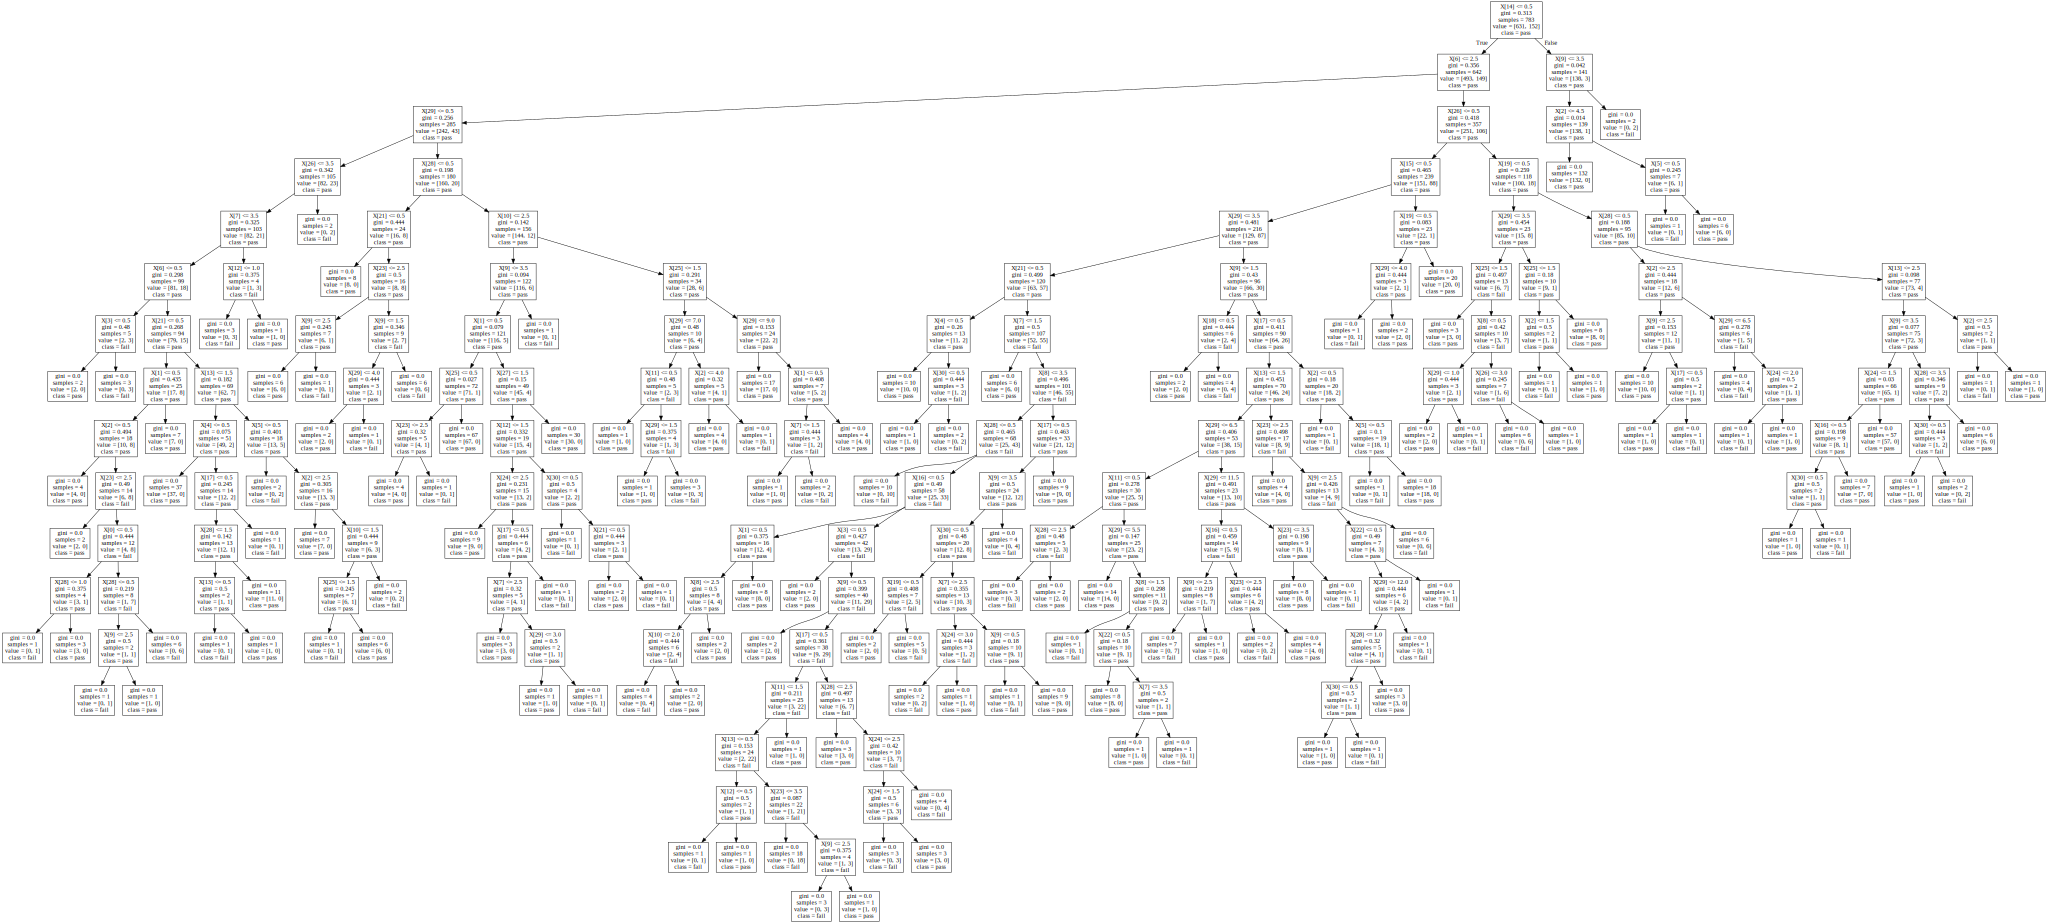

In [13]:
dot_data = tree.export_graphviz(tree_model, class_names=['pass', 'fail'])
graph = graphviz.Source(dot_data)
graph

Neural Net

In [14]:
import tensorflow as tf
from tensorflow import keras

In [15]:
train_float = np.asarray(train).astype('float32')
test_float = np.asarray(test).astype('float32')

X_train_tensor = tf.convert_to_tensor(train_float[:,0:31])
df2 = train_float[:,31]
y_train_tensor = tf.convert_to_tensor(df2)

X_test_tensor = tf.convert_to_tensor(test_float[:,0:31])
df3 = test_float[:,31]
y_test_tensor = tf.convert_to_tensor(df3)

In [16]:
model = keras.Sequential([
    keras.layers.Dense(400, input_shape=(31,), activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_tensor, y_train_tensor, epochs=250)

Epoch 1/250
25/25 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7860
Epoch 2/250
25/25 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.8131
Epoch 3/250
25/25 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.8252
Epoch 4/250
25/25 [==============================] - 0s 1ms/step - loss: 0.4524 - accuracy: 0.8127
Epoch 5/250
25/25 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8086
Epoch 6/250
25/25 [==============================] - 0s 1ms/step - loss: 0.4383 - accuracy: 0.8082
Epoch 7/250
25/25 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.8125
Epoch 8/250
25/25 [==============================] - 0s 1ms/step - loss: 0.4176 - accuracy: 0.8160
Epoch 9/250
25/25 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8008
Epoch 10/250
25/25 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8115
Epoch 11/

25/25 [==============================] - 0s 1ms/step - loss: 0.2254 - accuracy: 0.9184
Epoch 84/250
25/25 [==============================] - 0s 1ms/step - loss: 0.2262 - accuracy: 0.9011
Epoch 85/250
25/25 [==============================] - 0s 1ms/step - loss: 0.2312 - accuracy: 0.9055
Epoch 86/250
25/25 [==============================] - 0s 1ms/step - loss: 0.2096 - accuracy: 0.9154
Epoch 87/250
25/25 [==============================] - 0s 1ms/step - loss: 0.2062 - accuracy: 0.9049
Epoch 88/250
25/25 [==============================] - 0s 1ms/step - loss: 0.2145 - accuracy: 0.9170
Epoch 89/250
25/25 [==============================] - 0s 1ms/step - loss: 0.2598 - accuracy: 0.8935
Epoch 90/250
25/25 [==============================] - 0s 1ms/step - loss: 0.2421 - accuracy: 0.9035
Epoch 91/250
25/25 [==============================] - 0s 1ms/step - loss: 0.2097 - accuracy: 0.9333
Epoch 92/250
25/25 [==============================] - 0s 1ms/step - loss: 0.2353 - accuracy: 0.9122
Epoch 93/250


25/25 [==============================] - 0s 1ms/step - loss: 0.0738 - accuracy: 0.9899
Epoch 165/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.9856
Epoch 166/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0949 - accuracy: 0.9673
Epoch 167/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9755
Epoch 168/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0640 - accuracy: 0.9893
Epoch 169/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0612 - accuracy: 0.9917
Epoch 170/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0501 - accuracy: 0.9949
Epoch 171/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0607 - accuracy: 0.9919
Epoch 172/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.9866
Epoch 173/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0599 - accuracy: 0.9925
Epoc

25/25 [==============================] - 0s 1ms/step - loss: 0.0153 - accuracy: 0.9996
Epoch 246/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0167 - accuracy: 0.9979
Epoch 247/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0143 - accuracy: 0.9990
Epoch 248/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0128 - accuracy: 1.0000
Epoch 249/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0204 - accuracy: 1.0000
Epoch 250/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 1.0000


In [17]:
results = model.evaluate(X_test_tensor, y_test_tensor)
print("test loss, test accuracy:", results)

9/9 [==============================] - 0s 1ms/step - loss: 0.7005 - accuracy: 0.8084
test loss, test accuracy: [0.7005155086517334, 0.8084291219711304]


Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
y_pred = model.predict(X_test)

In [21]:
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.8045977011494253
